In [14]:
import numpy as np
from key_mappings import readable_keymap, js_keymap
import matplotlib.pyplot as plt
from collections import defaultdict

In [30]:
# scenario = 'desktop'
scenario = 'mobile'
# split = 'train'
split = 'test'

if split == 'train':
    filename = f'{scenario}/{scenario}_dev_set.npy'
else:
    filename = f'{scenario}/{scenario}_test_sessions.npy'
data = np.load(filename, allow_pickle=True).item()

if split != 'train':
    data = {'fake_user': data}

In [31]:
keys = list(data.keys())
print('Users in dataset:', len(keys))
user_key = keys[0]
session_key = list(data[user_key].keys())[3]

Users in dataset: 1


In [32]:
print('User:', user_key, 'Session:', session_key)
sample = data[user_key][session_key]
print('Length:', len(sample))

for arr in sample:
    letter = (arr[2])
    print(letter, end=' ')
print()
for arr in sample:
    if arr[2] in readable_keymap:
        letter = readable_keymap[arr[2]]
    else:
        letter = '�'
    print(letter, end='')

User: fake_user Session: 00KNSE9a
Length: 56
74 79 87 8 8 8 72 79 87 69 86 69 82 32 8 188 72 69 32 73 83 32 69 88 80 69 67 84 69 68 32 84 79 32 80 76 65 78 32 84 72 73 83 32 87 69 69 75 222 83 32 71 65 77 69 190 
JOW⌫⌫⌫HOWEVER␣⌫,HE␣IS␣EXPECTED␣TO␣PLAN␣THIS␣WEEK'S␣GAME.

In [33]:
def preprocess(sample):
    data = sample
    data[:, :2] = (data[:, :2] - data[0][0])
    duration = np.abs(data[:, 1] - data[:, 0])  # fix duration of keypress. ~349 items are broken
    diff_press = np.diff(data[:, 0], prepend=data[0, 0])
    data = np.column_stack((diff_press, duration, data[:, 2]))
    return data

preprocess(sample.copy())

array([[   0,   31,   74],
       [ 250,   15,   79],
       [ 946,   17,   87],
       [1554,   17,    8],
       [ 159,   16,    8],
       [ 395,   36,    8],
       [ 450,   29,   72],
       [ 298,   20,   79],
       [ 335,   15,   87],
       [ 284,   12,   69],
       [ 301,   15,   86],
       [ 185,   14,   69],
       [ 314,   19,   82],
       [ 437,   21,   32],
       [ 695,   19,    8],
       [1973,   21,  188],
       [1093,   21,   72],
       [ 290,   24,   69],
       [ 212,   17,   32],
       [ 586,   16,   73],
       [ 246,   16,   83],
       [ 233,   22,   32],
       [ 951,   16,   69],
       [ 380,   15,   88],
       [ 217,    8,   80],
       [ 237,   22,   69],
       [ 483,   17,   67],
       [ 230,   13,   84],
       [ 326,   17,   69],
       [ 260,   17,   68],
       [ 272,   27,   32],
       [ 456,   15,   84],
       [ 155,   12,   79],
       [ 239,   31,   32],
       [ 211,   10,   80],
       [ 215,   15,   76],
       [ 256,   17,   65],
 

In [34]:
keys_count = defaultdict(int)
sample_lengths = defaultdict(int)
diffs = defaultdict(int)
durations = defaultdict(int)
bad_samples = []
samples_229 = []

for user, user_data in data.items():
    for session, sample in user_data.items():
        preprocessed = preprocess(sample.copy())

        bad_keys = defaultdict(int)
        for s in sample:
            key = s[2]
            keys_count[key] += 1
            if key not in js_keymap:
                bad_keys[key] += 1
        if len(bad_keys) > 0:
            bad_samples.append((user, session, bad_keys))

        l = len(preprocessed)
        sample_lengths[l] += 1
        diff = np.median(preprocessed[:, 0])
        diffs[diff] += 1
        dur = np.median(preprocessed[:, 1])
        durations[dur] += 1

In [35]:
print('Amount of samples with bad symbols:', len(bad_samples))

Amount of samples with bad symbols: 39728


In [36]:
bad_samples

[('fake_user', '002zppFQ', defaultdict(int, {229: 31})),
 ('fake_user', '006TGB5C', defaultdict(int, {229: 56})),
 ('fake_user', '00N0VVm8', defaultdict(int, {229: 83})),
 ('fake_user', '00OSRAMI', defaultdict(int, {229: 48})),
 ('fake_user', '00e3C6x4', defaultdict(int, {229: 27})),
 ('fake_user', '00raY5d3', defaultdict(int, {229: 53})),
 ('fake_user', '00sPfECs', defaultdict(int, {229: 61})),
 ('fake_user', '0112yK4E', defaultdict(int, {229: 67})),
 ('fake_user', '013jc7dy', defaultdict(int, {229: 61})),
 ('fake_user', '01EjiNZg', defaultdict(int, {229: 25})),
 ('fake_user', '01JUYKr4', defaultdict(int, {229: 34})),
 ('fake_user', '01PfEYJc', defaultdict(int, {229: 33})),
 ('fake_user', '01SxbyFU', defaultdict(int, {229: 62})),
 ('fake_user', '01W7jOpw', defaultdict(int, {229: 51})),
 ('fake_user', '01Zvc8eO', defaultdict(int, {229: 49})),
 ('fake_user', '01eEFbth', defaultdict(int, {229: 94})),
 ('fake_user', '01oJshvX', defaultdict(int, {229: 105})),
 ('fake_user', '01oL3KvC', def

In [38]:
len(bad_samples)

39728

In [19]:
durations_np = np.array(list(durations.keys()))
diffs_np = np.array(list(diffs.keys()))

stats = {
    scenario: {
        'time': {
            'mean': np.mean(diffs_np),
            'std': np.std(diffs_np)
        },
        'duration': {
            'mean': np.mean(durations_np),
            'std': np.std(durations_np)
        }
    }
}

print(stats)

{'mobile': {'time': {'mean': 1296.0334410740925, 'std': 8359.629077095862}, 'duration': {'mean': 8596.112612612613, 'std': 70448.30938224563}}}


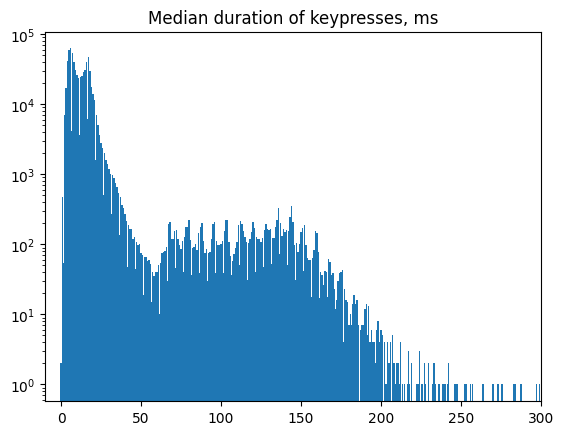

In [20]:
plt.bar(durations.keys(), durations.values(), log=True)
plt.xlim(-10, 300)
plt.title('Median duration of keypresses, ms')
plt.show()

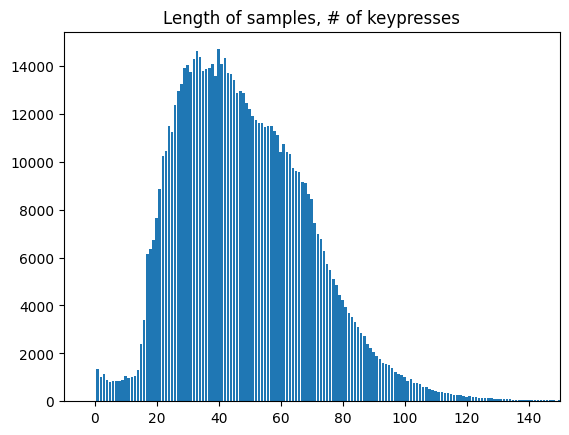

In [21]:
plt.bar(sample_lengths.keys(), sample_lengths.values())
plt.xlim(-10, 150)
plt.title('Length of samples, # of keypresses')
plt.show()

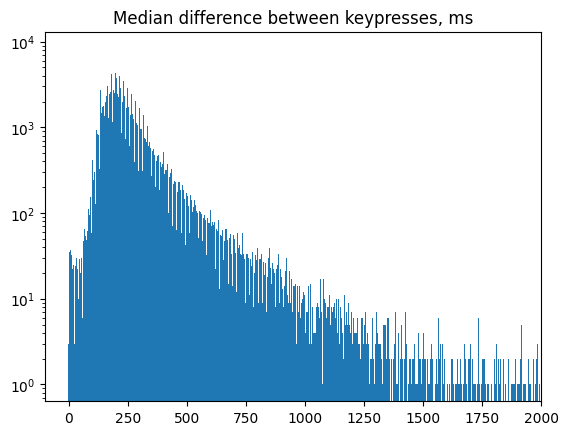

In [22]:
plt.bar(diffs.keys(), diffs.values(), log=True)
plt.xlim(-100, 2000)
plt.title('Median difference between keypresses, ms')
plt.show()

In [23]:
sort = sorted(keys_count.items(), key=lambda x: x[1], reverse=True)
for key, count in sort:
    if key in readable_keymap:
        # print(readable_keymap[key], count)
        pass
    elif key in readable_keymap:
        print('+-', readable_keymap[key], count)
    else:
        print('--', key, count)

-- 229 20826777
-- 0 291997
-- 122 216
-- 123 134
-- 27 97
-- 145 49
-- 142 34
-- 112 24
-- 19 21
-- 115 17
-- 118 14
-- 121 11
-- 113 9
-- 117 8
-- 179 8
-- 120 7
-- 114 5
-- 116 4
-- 177 3
-- 119 2
-- 178 1
-- 92 1
